100%|██████████| 50/50 [00:01<00:00, 33.67it/s]


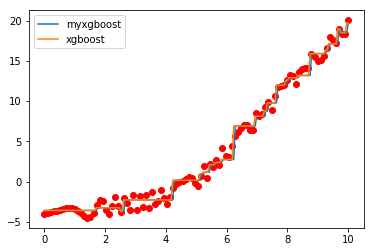

In [195]:
from MyXGBoost import *
import matplotlib.pyplot as plt
%matplotlib inline 
#x = np.arange(10)+1
#x = x.reshape([-1,1])
#y = np.array([5.56,5.7,5.91,6.4,6.8,7.05,8.9,8.7,9,9.05])

x = np.linspace(0,10,100)
y = np.sin(x) + (x/2)**2 - 5 + np.cos(x**3)
x = x.reshape([-1,1])



clf = xgboost(max_depth=1, n_estimators=50, learning_rate=1, loss=SquareError)
clf.fit(x,y)

dtrain = xgb.DMatrix(x,y)
param = {'max_depth':1, 'eta':1, 'silent':1, 'objective':'reg:linear', 
         'lambda':0, 'alpha':0, 'gamma':0}
clf2 = xgb.train(param, dtrain, 50)

#X = np.linspace(0,11,50).reshape([-1,1])
X = np.linspace(0,10,200).reshape([-1,1])
dtest = xgb.DMatrix(X)
y_pred2 = clf2.predict(dtest)
y_pred = clf.predict(X)

plt.figure()
plt.scatter(x,y,c='r')
plt.plot(X.squeeze(), y_pred, '-')
plt.plot(X.squeeze(), y_pred2, '-')
plt.legend(['myxgboost', 'xgboost'])
plt.show()




100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


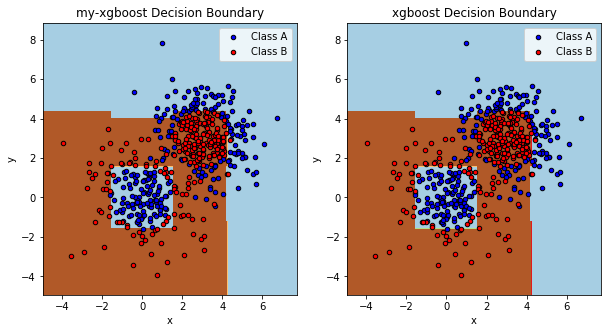

In [198]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

plt.figure()
# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes=2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

N=20
lr = .3

bdt = xgboost(max_depth=1, n_estimators=N, learning_rate=lr, loss=CrossEntropy)
bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
plt.subplot(121)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

ZZ = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.sign(ZZ)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('my-xgboost Decision Boundary')


plt.subplot(122)
# read in data
dtrain = xgb.DMatrix(X,y)
# specify parameters via map
param = {'max_depth':1, 'eta':lr, 'silent':1, 'objective':'binary:logitraw', 'lambda':0, 'alpha':0, 'gamma':0}
num_round = N
bst = xgb.train(param, dtrain, num_round)
# make prediction
dtest = xgb.DMatrix(np.c_[xx.ravel(), yy.ravel()])
ZZZ = bst.predict(dtest)
Z = np.sign(ZZZ)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c=c, cmap=plt.cm.Paired,
                s=20, edgecolor='k',
                label="Class %s" % n)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('xgboost Decision Boundary')

plt.show()